In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Road.csv')

In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.shape

(12316, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

#  **Nan Value**

In [8]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

# **EDA**

# **Countplot of Defect of Vehicle**

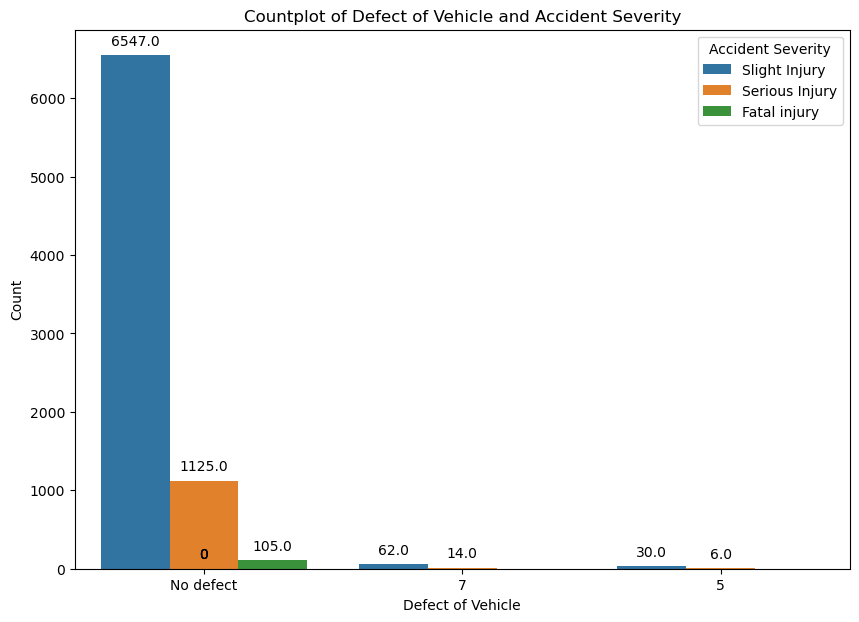

In [11]:
# plt.figure(figsize=(12,10))
# sns.countplot(x='Defect_of_vehicle',hue='Accident_severity',data=df)
# plt.title('Countplot of Defect of Vehicle and Accident_severity')
# plt.show()
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Defect_of_vehicle', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Defect of Vehicle and Accident Severity')
plt.xlabel('Defect of Vehicle')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()


In [12]:
df.drop('Defect_of_vehicle',axis=1,inplace=True) 

# **Countplot of Service Year of Vehicle**

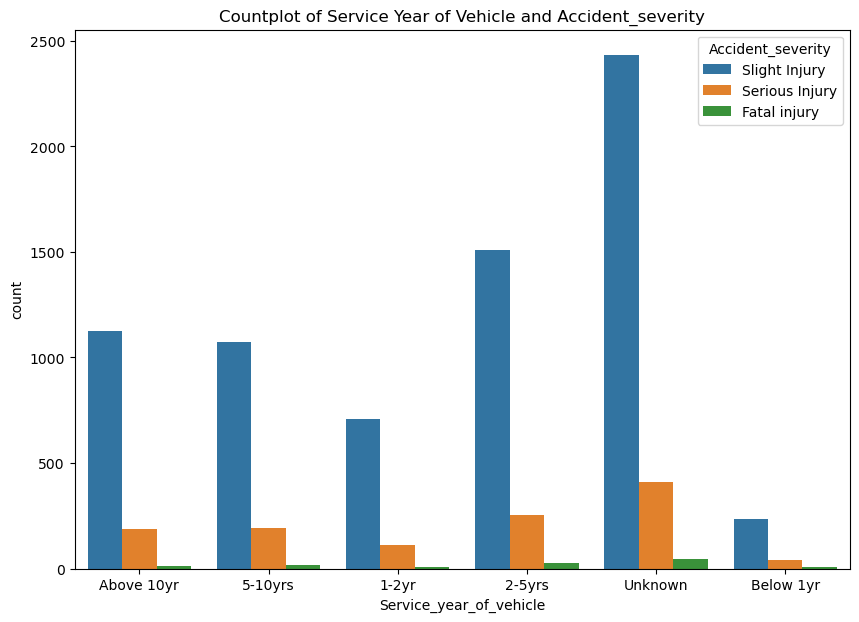

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=df)
plt.title('Countplot of Service Year of Vehicle and Accident_severity')
plt.show()

In [15]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

In [16]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# **Countplot of Work of Casuality**

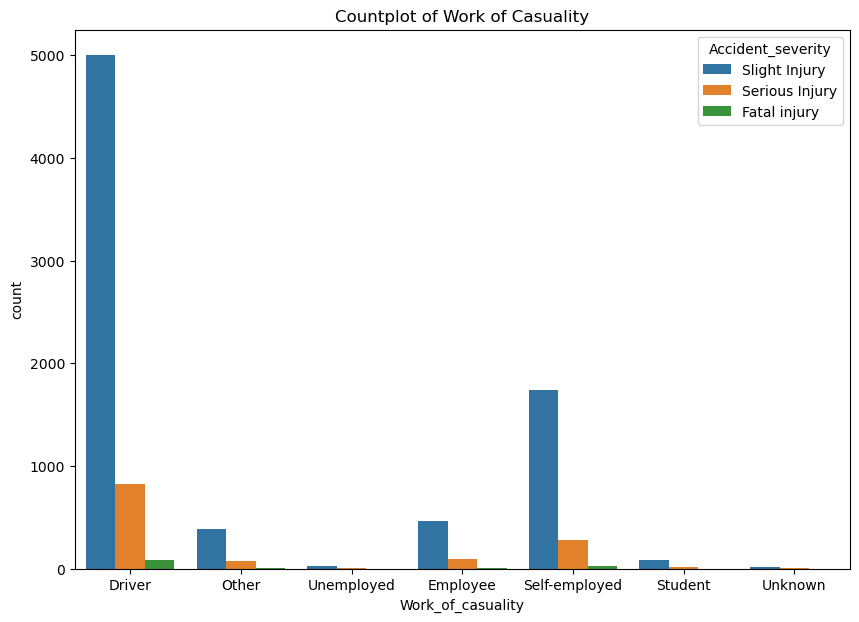

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Work of Casuality")
plt.show()

In [19]:
df['Work_of_casuality'].fillna('Unknown',inplace=True)

C:\Users\Ishu\AppData\Local\Temp\ipykernel_52888\1397738550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_of_casuality'].fillna('Unknown',inplace=True)


In [20]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Unknown,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,NaN,Not a Pedestrian,Overtaking,Slight Injury


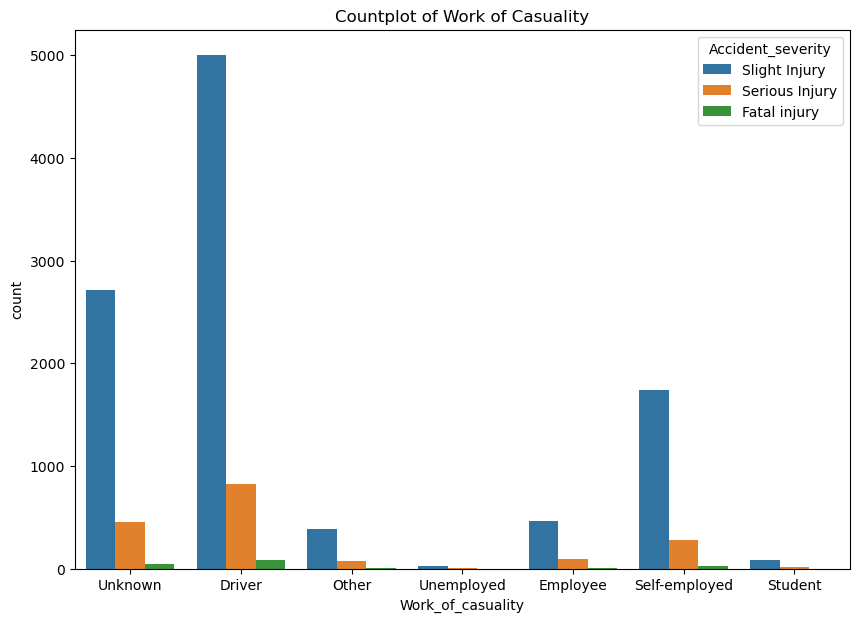

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Work of Casuality")
plt.show()

# **Countplot of Fitness of Casuality**

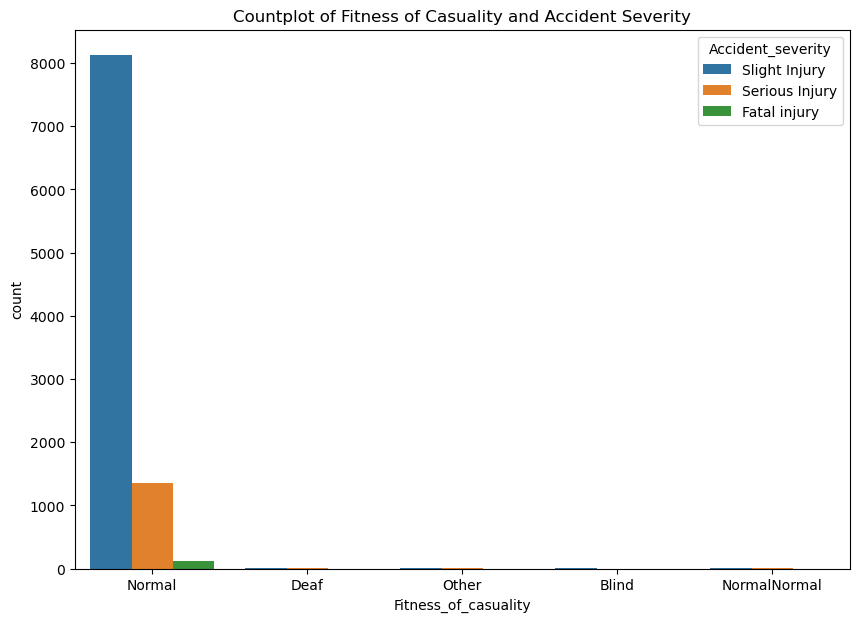

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='Fitness_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Fitness of Casuality and Accident Severity")
plt.show()

In [24]:
df.drop('Fitness_of_casuality',axis=1,inplace=True)

# After Visualizing data we saw in all the above bar plot that slight injuries are more than serious and fatal injuries

In [26]:
df.dropna(inplace=True)

In [27]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# **Count Plot of Sex of Driver**

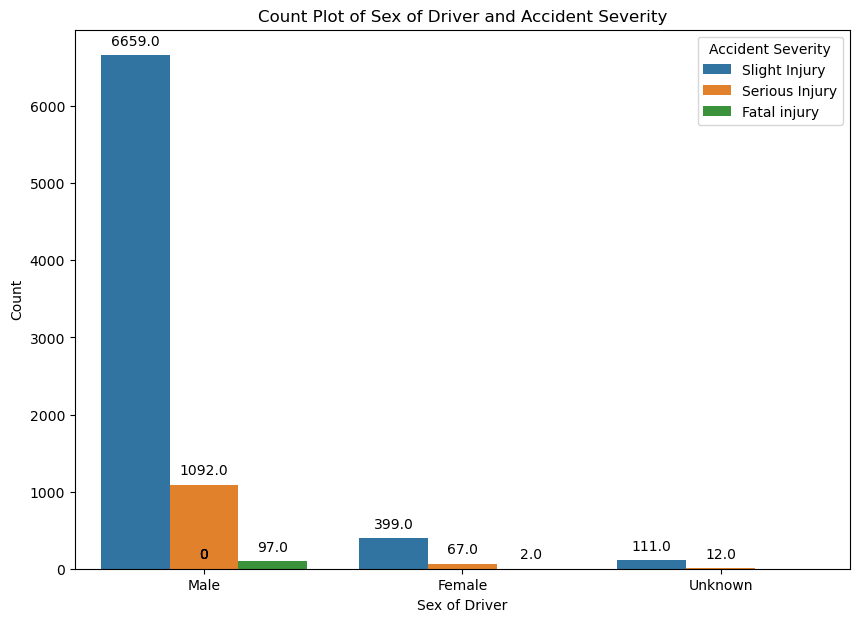

In [29]:

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Count Plot of Sex of Driver and Accident Severity')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **From the above plot we saw that males are more prone to accidents then females**

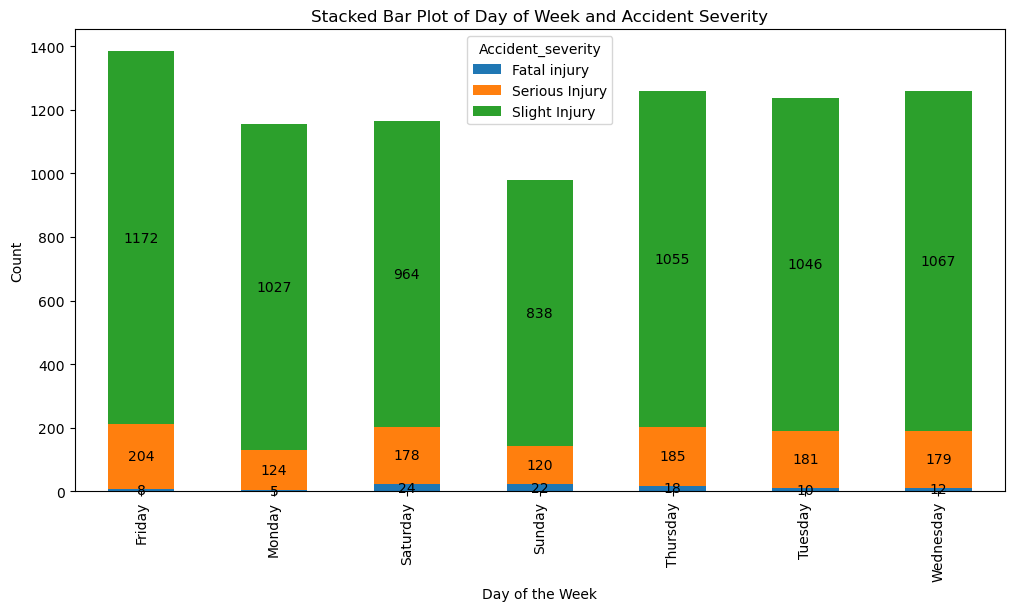

In [31]:
cross_tab = pd.crosstab(df['Day_of_week'], df['Accident_severity'])

ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels on top of each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Stacked Bar Plot of Day of Week and Accident Severity')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.show()

In [32]:
pd.crosstab(df['Day_of_week'], df['Accident_severity'])

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Day_of_week,,,
Friday,8,204,1172
Monday,5,124,1027
Saturday,24,178,964
Sunday,22,120,838
Thursday,18,185,1055
Tuesday,10,181,1046
Wednesday,12,179,1067


# *Friday has the most accidents*

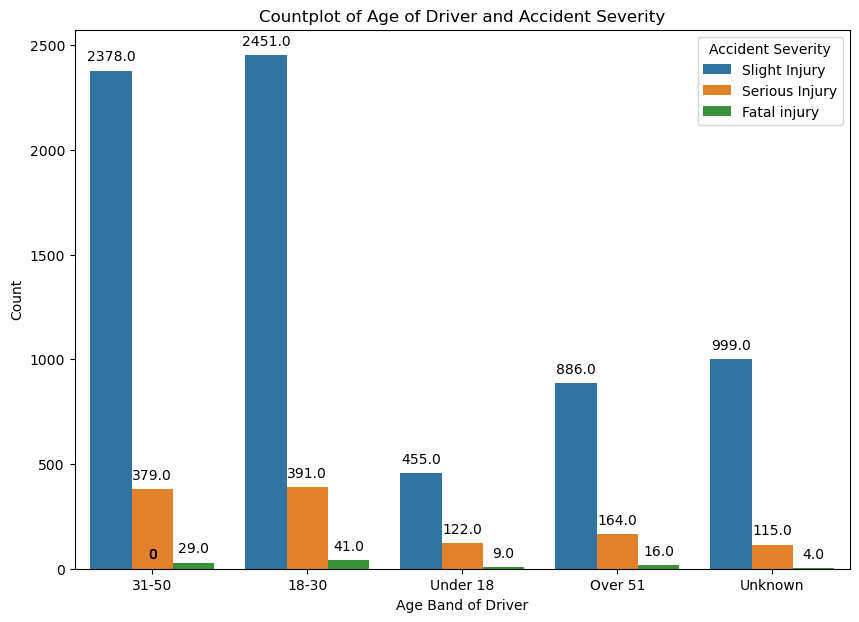

In [34]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Age of Driver and Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **In the above plot we found that 18 to 30 Age People are more prone to accidents **

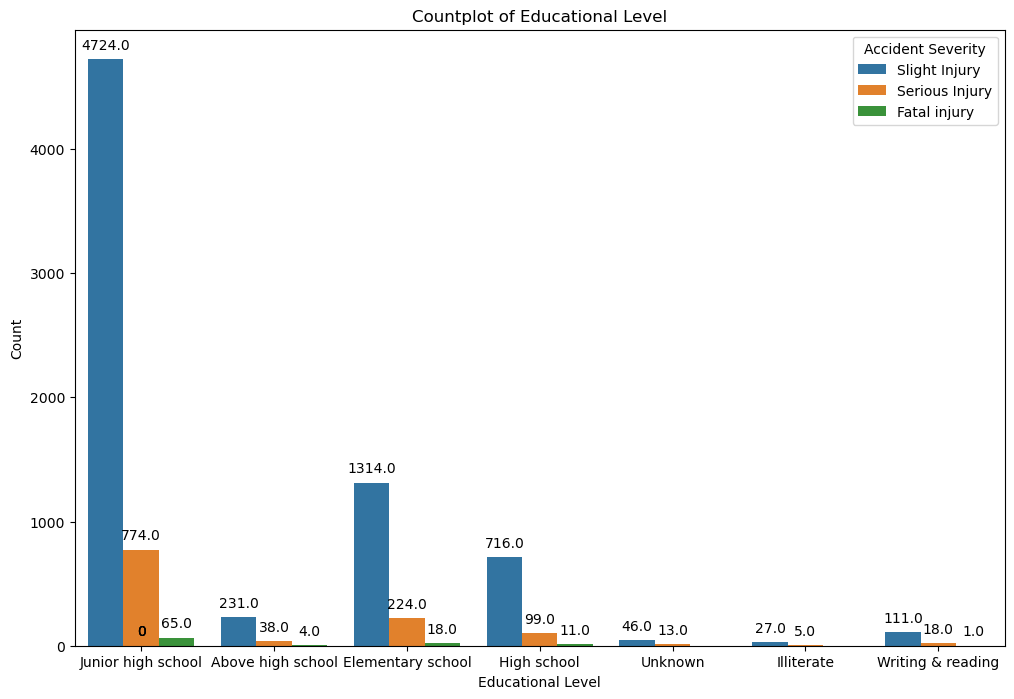

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Educational_level', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **Junior High School Students are more prone to accidents**

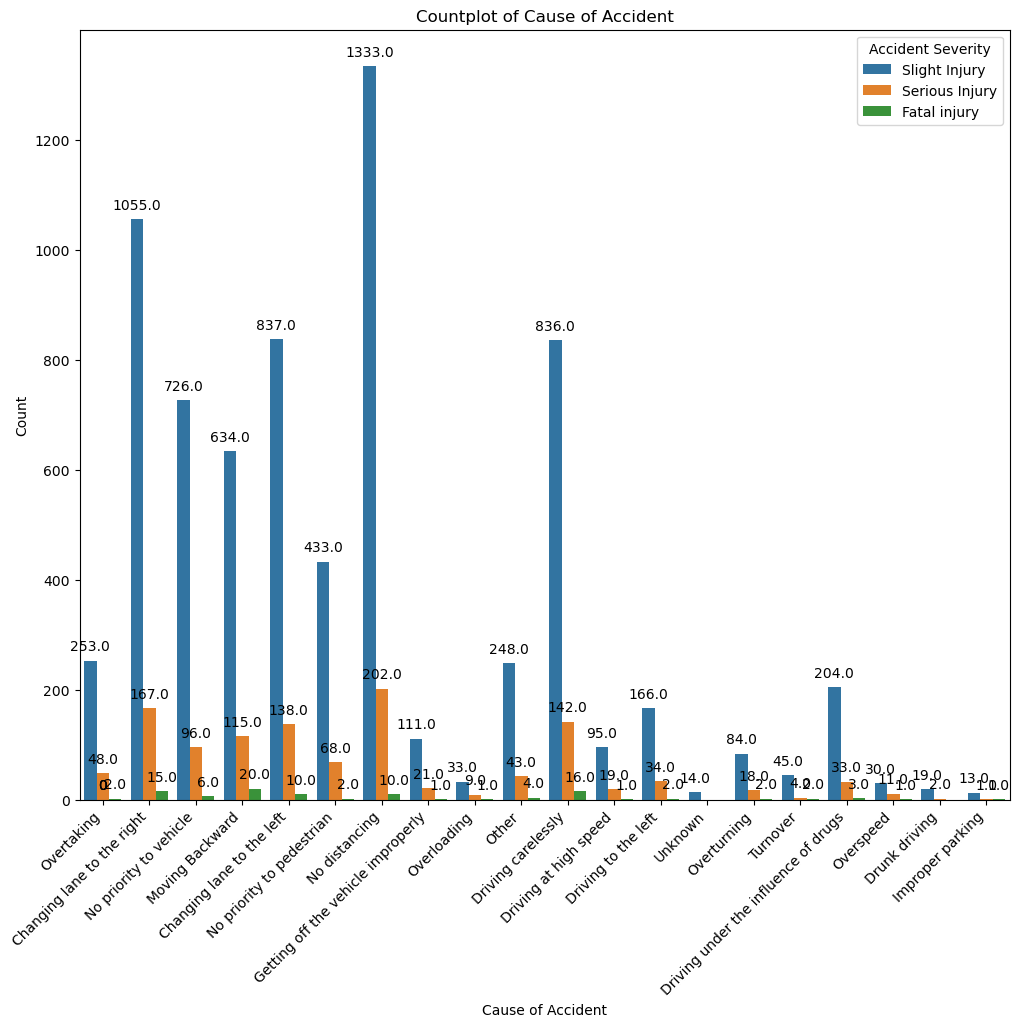

In [38]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Cause_of_accident', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Count')
plt.legend(title='Accident Severity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# In conclusion we found that Males of Junior High School students mostly on friday are prone to accidents because of No distancing and changing the lane right to left causes the accident and occurs slightly injuries more often
# 

In [40]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,1,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,1,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,9:05:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,2,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,1,Other,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# **Converting DateTime format**

In [42]:
df['Time'].unique()

array(['17:02:00', '1:06:00', '17:20:00', ..., '7:24:00', '2:47:00',
       '16:26:00'], dtype=object)

In [43]:
time_series=pd.to_datetime(df['Time'],format="%H:%M:%S")

In [44]:
rounded_times=time_series.dt.round('30min')

In [45]:
rounded_times_str = rounded_times.dt.strftime('%H:%M:%S')

In [46]:
pd.DataFrame({'Time':df['Time'],'Latest time':rounded_times_str})

,Time,Latest time
1,17:02:00,17:00:00
3,1:06:00,01:00:00
7,17:20:00,17:30:00
8,17:20:00,17:30:00
9,17:20:00,17:30:00
...,...,...
12309,9:05:00,09:00:00
12312,18:00:00,18:00:00
12313,13:55:00,14:00:00
12314,13:55:00,14:00:00


In [47]:
df.drop('Time',axis=1,inplace=True)


In [48]:
df=pd.concat([rounded_times_str,df],axis=1)

In [49]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,1,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,1,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,09:00:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,2,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,No distancing,Slight Injury
12313,14:00:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,1,Other,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,14:00:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [50]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int

# **Countplot of Accident severity**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


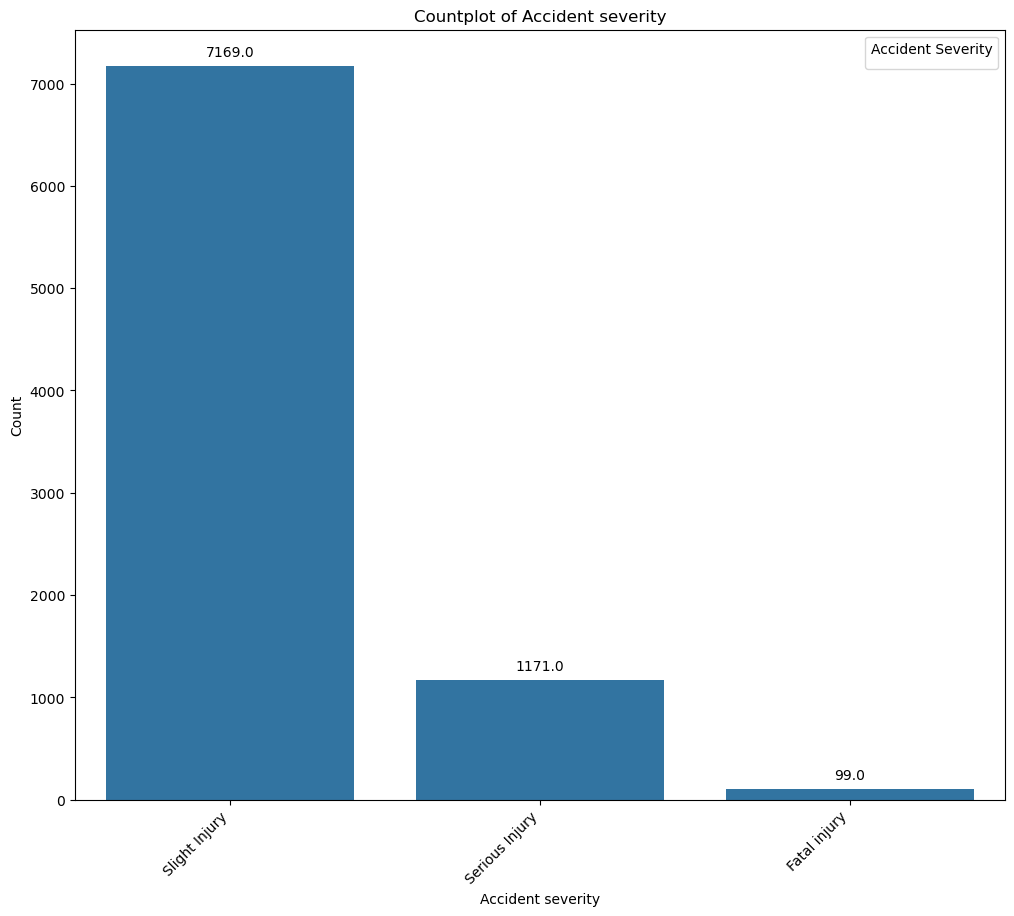

In [52]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Accident severity')
plt.xlabel('Accident severity')
plt.ylabel('Count')
plt.legend(title='Accident Severity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [53]:
(df['Accident_severity'].value_counts()/8439)*100

Accident_severity
Slight Injury     84.950824
Serious Injury    13.876052
Fatal injury       1.173125
Name: count, dtype: float64

In [54]:
categorical_columns=df.select_dtypes('object')


In [55]:
categorical_columns

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Vehicle with vehicle collision,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,Vehicle with vehicle collision,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Collision with roadside-parked vehicles,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Collision with roadside-parked vehicles,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,09:00:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,Collision with roadside objects,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Not a Pedestrian,No distancing,Slight Injury
12313,14:00:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,14:00:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# **Stacked Bar Plot of Type of Vehicle and Accident Severity**

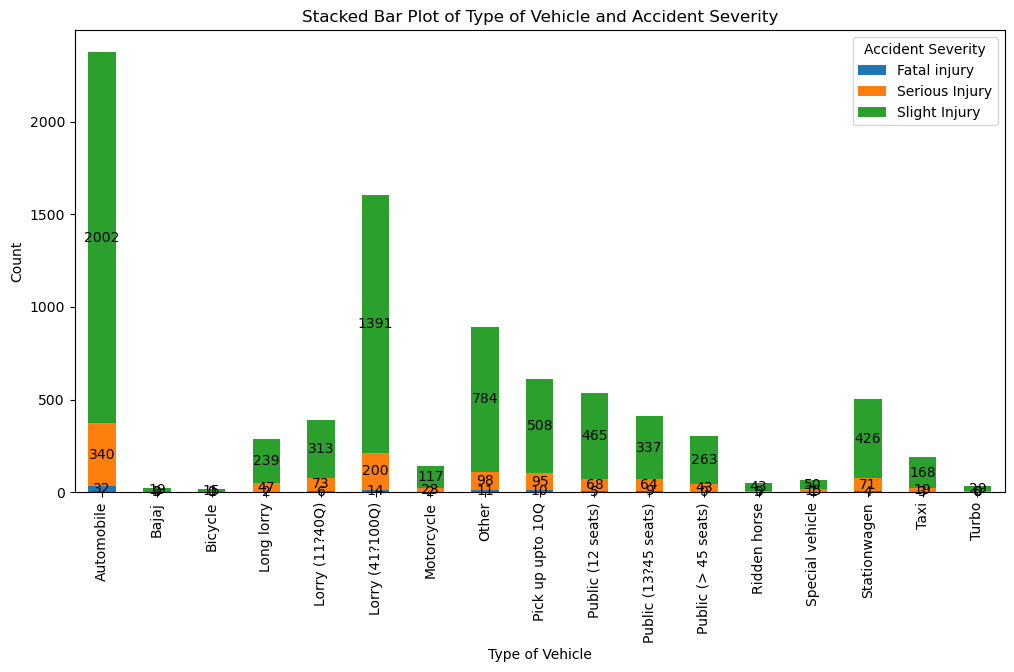

In [57]:
vehicle_crosstab = pd.crosstab(df['Type_of_vehicle'], df['Accident_severity'])

ax = vehicle_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels on top of each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Stacked Bar Plot of Type of Vehicle and Accident Severity')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **Dropping unnecessary features**

In [59]:
df.drop(columns=['Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Lanes_or_Medians', 'Road_allignment', 'Road_surface_type', 'Road_surface_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Pedestrian_movement'],inplace=True)

In [60]:
df

,Time,Day_of_week,Age_band_of_driver,Driving_experience,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Above 10yr,Office areas,No junction,Daylight,2,2,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,5-10yr,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,2-5yr,Residential areas,Y Shape,Daylight,2,1,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Above 10yr,Industrial areas,Y Shape,Daylight,2,1,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,1-2yr,Residential areas,Y Shape,Daylight,2,1,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...
12309,09:00:00,Friday,31-50,5-10yr,School areas,No junction,Darkness - lights lit,2,2,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,5-10yr,Outside rural areas,No junction,Daylight,2,1,No distancing,Slight Injury
12313,14:00:00,Sunday,Over 51,5-10yr,Outside rural areas,No junction,Daylight,1,1,Changing lane to the right,Serious Injury
12314,14:00:00,Sunday,18-30,Above 10yr,Office areas,No junction,Darkness - lights lit,2,1,Driving under the influence of drugs,Slight Injury


# **Performing One Hot Encoding  **

In [62]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')


In [63]:
categorical_columns=df.select_dtypes('object')

In [64]:
categorical_columns.drop('Accident_severity',axis=1,inplace=True)

In [65]:
encoded_data=encoder.fit_transform(categorical_columns)

In [66]:
encoded_data=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

# **Putting Numerical Columns in One**

In [68]:
numerical_columns=['Number_of_vehicles_involved','Number_of_casualties','Accident_severity']
numerical_columns

['Number_of_vehicles_involved', 'Number_of_casualties', 'Accident_severity']

In [69]:
combined_data=pd.concat([encoded_data,df[numerical_columns]],axis=1)
combined_data

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Slight Injury
12312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury
12313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Serious Injury
12314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury


In [70]:
combined_data.dropna(inplace=True)

In [71]:
combined_data.isnull().sum()

Time_00:30:00                  0
Time_01:00:00                  0
Time_01:30:00                  0
Time_02:00:00                  0
Time_02:30:00                  0
                              ..
Cause_of_accident_Turnover     0
Cause_of_accident_Unknown      0
Number_of_vehicles_involved    0
Number_of_casualties           0
Accident_severity              0
Length: 107, dtype: int64

In [72]:
combined_data

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Slight Injury
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Slight Injury
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,Slight Injury
8434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,Slight Injury
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,Slight Injury
8437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Slight Injury


In [73]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
combined_data['Accident_severity']=oe.fit_transform(combined_data['Accident_severity'].values.reshape(-1,1))


In [74]:
combined_data['Accident_severity']

1       2.0
3       2.0
7       2.0
8       2.0
9       1.0
       ... 
8433    2.0
8434    2.0
8435    2.0
8437    2.0
8438    2.0
Name: Accident_severity, Length: 6274, dtype: float64

# **Performing Train-Split**

In [76]:
from sklearn.model_selection import train_test_split
X=combined_data.drop('Accident_severity',axis=1)
y=combined_data['Accident_severity']

In [77]:
X

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
8434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
8437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [78]:
y

1       2.0
3       2.0
7       2.0
8       2.0
9       1.0
       ... 
8433    2.0
8434    2.0
8435    2.0
8437    2.0
8438    2.0
Name: Accident_severity, Length: 6274, dtype: float64

# **Random Over-sampling Method**

In [80]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy='auto')
X_res,y_res=ros.fit_resample(X,y)

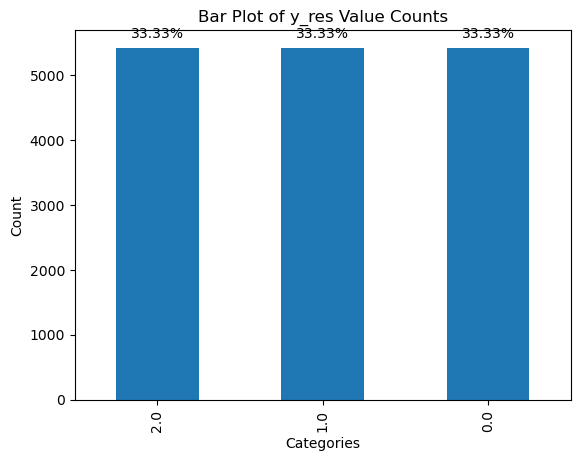

In [81]:
value_counts = y_res.value_counts()
total = len(y_res)

ax = value_counts.plot.bar()

# Adding percentage labels on top of the bars
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Bar Plot of y_res Value Counts')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

In [82]:
X_res.shape

(16257, 106)

In [83]:
y_res.shape

(16257,)

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [85]:
X_train

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
10133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
14284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
12618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
8035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [86]:
X_test


,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
12190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
7033,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [87]:
y_train

10133    0.0
14284    1.0
12618    1.0
8035     0.0
2532     2.0
        ... 
13418    1.0
5390     2.0
860      2.0
15795    1.0
7270     0.0
Name: Accident_severity, Length: 11379, dtype: float64

In [88]:
y_test

304      2.0
2087     2.0
1213     2.0
2439     2.0
12190    1.0
        ... 
3794     2.0
1501     2.0
4963     2.0
7033     0.0
6958     0.0
Name: Accident_severity, Length: 4878, dtype: float64

# **Decision Tree**

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import seaborn as sns

# Create the classifier object
decision_tree = DecisionTreeClassifier()

# Training the classifier
decision_tree.fit(X_train, y_train)

# Predicting results using the test dataset
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_prob_decision_tree = decision_tree.predict_proba(X_test)[:, 1]

# Printing the accuracy and ROC AUC score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_decision_tree))
# print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_decision_tree))

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_decision_tree)

# Plotting the confusion matrix
# plt.figure(figsize=(6, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
# plt.title('Confusion Matrix of Decision Tree')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()


Accuracy: 0.931939319393194


# **Random Forest**

In [92]:
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, y_train, n_estimators=250):
 rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 rndforest.fit(X_train, y_train)
 return rndforest
random_forest_en = rf(X_train,y_train.values.ravel(), n_estimators=250)
print("TRAINING ACCURACY:", random_forest_en.score(X_train, y_train))
print("VALIDATION ACCURACY", random_forest_en.score(X_test, y_test))

TRAINING ACCURACY: 0.9996484752614465
VALIDATION ACCURACY 0.9895448954489545


In [172]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
# print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

# Plots of ROC AUC
# fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_knn)

# plt.figure(figsize=(6,4))
# # plt.plot(fpr_tree, tpr_tree, linewidth=2, color='orange')
# plt.plot([0,1], [0,1], 'r--')
# # plt.title('ROC Curve of Decision Tree')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# plt.show()

# Calculating the confusion matrix
# conf_matrix = confusion_matrix(y_test,y_pred_knn)

# Plotting the confusion matrix
# plt.figure(figsize=(6, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
# plt.title('Confusion Matrix of KNN')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()


Accuracy: 0.8511685116851169


In [174]:
import pickle

# Assuming 'model' is your trained model
pickle_file = "y_pred_prob_knn.pkl"

# Save the model
with open(pickle_file, 'wb') as file:
    pickle.dump(random_forest_en, file)

# To load the model
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

In [94]:
pip install streamlit streamlit_jupyter


Note: you may need to restart the kernel to use updated packages.


In [170]:
import streamlit as st
import pandas as pd
import joblib

# Load the model (make sure you have a model file named 'accident_model.pkl')
model = joblib.load('random_forest_en.pkl')

# Streamlit app
st.title('Accident Severity Prediction')

# Collect user input
Time = st.text_input('Time')
Day_of_week = st.selectbox('Day of Week', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
Age_band_of_driver = st.selectbox('Age band of driver', ['0-18', '19-30', '31-50', '51-65', '65+'])
Sex_of_driver = st.selectbox('Sex of driver', ['Male', 'Female'])
Educational_level = st.selectbox('Educational level', ['None', 'Primary', 'Secondary', 'Higher'])
Vehicle_driver_relation = st.selectbox('Vehicle driver relation', ['Owner', 'Non-owner'])
Driving_experience = st.selectbox('Driving experience (years)', ['<1', '1-2', '2-5', '5-10', '10+'])
Type_of_vehicle = st.selectbox('Type of vehicle', ['Car', 'Truck', 'Motorcycle', 'Bicycle', 'Other'])
Owner_of_vehicle = st.selectbox('Owner of vehicle', ['Owner', 'Non-owner'])
Service_year_of_vehicle = st.number_input('Service year of vehicle', min_value=0, max_value=50, step=1)
Type_of_collision = st.selectbox('Type of collision', ['Head-on', 'Rear-end', 'Side', 'Rollover', 'Other'])
Vehicle_movement = st.selectbox('Vehicle movement', ['Moving', 'Parked', 'Stopped'])
Casualty_class = st.selectbox('Casualty class', ['Driver', 'Passenger', 'Pedestrian'])
Sex_of_casualty = st.selectbox('Sex of casualty', ['Male', 'Female'])
Age_band_of_casualty = st.selectbox('Age band of casualty', ['0-18', '19-30', '31-50', '51-65', '65+'])
Casualty_severity = st.selectbox('Casualty severity', ['Minor', 'Serious', 'Fatal'])
Work_of_casuality = st.selectbox('Work of casualty', ['Employed', 'Student', 'Unemployed', 'Retired'])
Pedestrian_movement = st.selectbox('Pedestrian movement', ['Walking', 'Running', 'Standing', 'Other'])
Cause_of_accident = st.text_input('Cause of accident')
Accident_severity = st.selectbox('Accident severity', ['Low', 'Medium', 'High'])

# Create dataframe 
input_data = pd.DataFrame({
    'Time': [Time],
    'Day_of_week': [Day_of_week],
    'Age_band_of_driver': [Age_band_of_driver],
    'Sex_of_driver': [Sex_of_driver],
    'Educational_level': [Educational_level],
    'Vehicle_driver_relation': [Vehicle_driver_relation],
    'Driving_experience': [Driving_experience],
    'Type_of_vehicle': [Type_of_vehicle],
    'Owner_of_vehicle': [Owner_of_vehicle],
    'Service_year_of_vehicle': [Service_year_of_vehicle],
    'Type_of_collision': [Type_of_collision],
    'Vehicle_movement': [Vehicle_movement],
    'Casualty_class': [Casualty_class],
    'Sex_of_casualty': [Sex_of_casualty],
    'Age_band_of_casualty': [Age_band_of_casualty],
    'Casualty_severity': [Casualty_severity],
    'Work_of_casuality': [Work_of_casuality],
    'Pedestrian_movement': [Pedestrian_movement],
    'Cause_of_accident': [Cause_of_accident],
    'Accident_severity': [Accident_severity]
})

# Predict button
if st.button('Predict'):
    # Make a prediction
    prediction = model.predict(input_data)
    
    # Display the prediction
    st.write(f'Prediction: {prediction[0]}')


2024-07-08 14:47:57.353 
  command:

    streamlit run C:\Users\Ishu\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
